# Udemy 【한글자막】머신러닝의 모든 것 with Python, R


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Polynomial Regression(다항식 회귀)

## 직급 수준에 맞는 급여 예측 - 6과 7사이의 직급 수준에 대한 급여 예측.


> - 강의 70 - 다항식 회귀 1단계
- 강의 71 - 다항식 회귀 2단계
- 강의 72 - 다항식 회귀 3단계
- 강의 73 - 다항식 회귀 4단계




## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/UDEMY/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression(회귀)/Section 6 - Polynomial Regression(다항 선형 회귀)/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()
print('=============================')
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Position    0
Level       0
Salary      0
dtype: int64

In [5]:
dataset.iloc[:, 1:-1]
dataset.iloc[:, 1:-1].values
# dataset['Level'].values  맞겠지 생각했는데 Expected 2D array, got 1D array instead 에러 발생

X = dataset.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
# 연봉 y값
dataset['Salary'].values
y = dataset['Salary'].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
# 훈련데이터, 테스트데이터 나누는 단계는 건너뜀.
# 최대 데이터를 극대화해야 후에 6과 7사이의 직급 수준 급여를 예측 가능함.

# 건너뛰었을때
# 첫번째 단계 : 선형 회귀 모형을 훈련(전체데이터) 
# 선형과 다항회귀 비교해보기 위해서

## Training the Linear Regression model on the whole dataset
선형 회귀 훈련

In [7]:
# 선형회귀
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset
다항 회귀 훈련

In [8]:
# 비선형 회귀?
# 다항요소
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)

poly_reg.fit_transform(X)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

- 다항회귀 모형은 비선형적 데이티 집합에 적합함.
- 비선형적 관례를 가진 두 개의 데이터 집합.

## Visualising the Linear Regression results

선형 회귀 시각화

|Position|Level|Salary|
|---|---|---|
|Business Analyst|1|45000|
|Junior Consultant|2|50000|
|Senior Consultant|3|60000|
|Manager|4|80000|
|Country Manager|5|110000|
|Region Manager|6|150000|
|Partner|7|200000|
|Senior Partner|8|300000|
|C-level|9|500000|
|CEO|10|1000000|

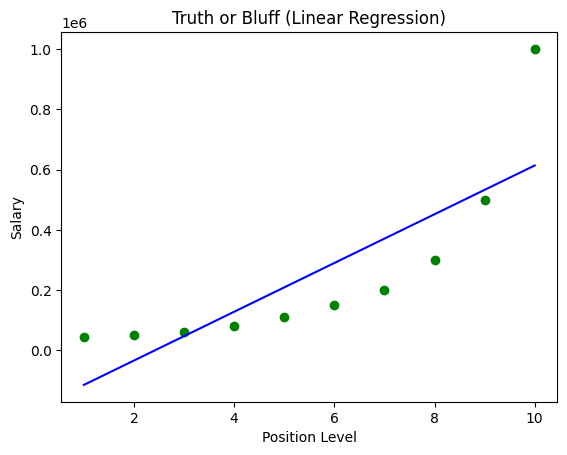

In [9]:
# x 직급, y 급여
plt.scatter(X, y, color = 'green')

# 예측 결과 y는 예측 결과
# lin_reg2는 다항 회귀 모형에 쓰임
# lin_reg 는 선형 회귀 모형에 사용
plt.plot(X, lin_reg.predict(X), color = 'blue')

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

In [ ]:
# 녹색점 : 실제 급여 
# 파란선 : 우리가 예측한 선형 회귀 모형의 예측 결과

# 실제 데이터와 예측 결과가 다름.
# 기존 단순 선형 회귀에 잘 맞은 경우는 매번 각 요소들의 값마다 예측이 실제 결과과 유사했기 때문.
# 이 선형회귀는 잘못 예측한 결과임.
# 이거대로 연봉협상했다가는 큰일 남.

# 여러 직급 수준이 있을때 여러 개의 미래 값이 있을 경우 예측 결과가 실제 결과와 멀 수 밖에 없음.

## Visualising the Polynomial Regression results
다항식 회귀 시각화

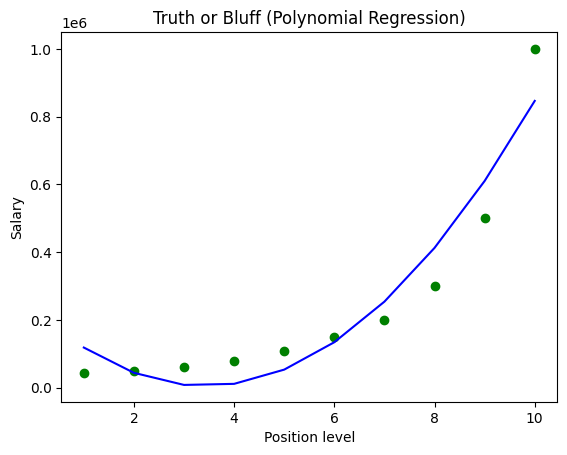

In [38]:
# x 직급, y 급여
plt.scatter(X, y, color = 'green')

# x는 단독 요소이기에 유지할 수 없음.
# X_poly = poly_reg.fit_transform(X)
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### ↑ ↓ y 값을 다르게 설정. 나머지는 동일함. 

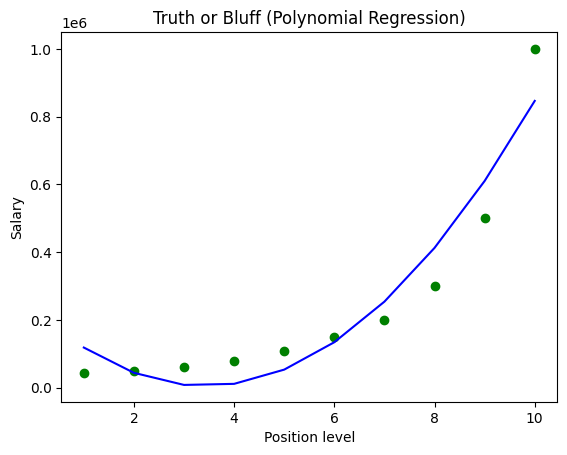

In [39]:
# x 직급, y 급여
plt.scatter(X, y, color = 'green')

# x는 단독 요소이기에 유지할 수 없음.
# X_poly = poly_reg.fit_transform(X)
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# 실제 급여와 비슷한 회귀 곡선 생김
# n=2 인 경우
# n=3, n=4 일경우 훨씬 나은 결과 나올수 있음.

### 다항 회귀 모형을 더 높은 값으로 훈련.

In [12]:
poly_reg4 = PolynomialFeatures(degree = 4)

poly_reg4.fit_transform(X)
X_poly4 = poly_reg4.fit_transform(X)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4, y)

LinearRegression()

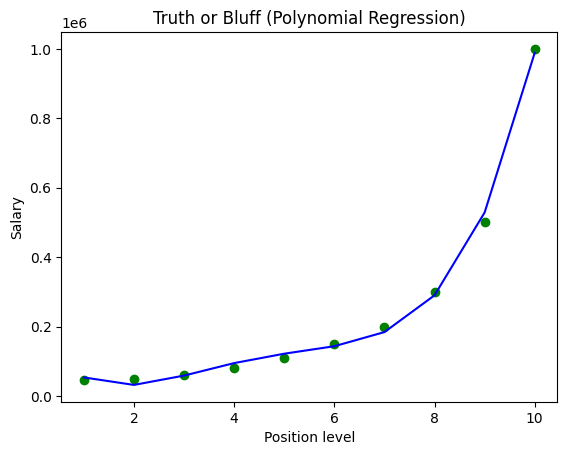

In [40]:
plt.scatter(X, y, color = 'green')

plt.plot(X, lin_reg_4.predict(X_poly4), color = 'blue')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# 좀 더 정확하게 곡선이 그려짐.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

다항 회귀 결과를 시각화 할 떄 더 높은 정밀도와 부드러운 곡선

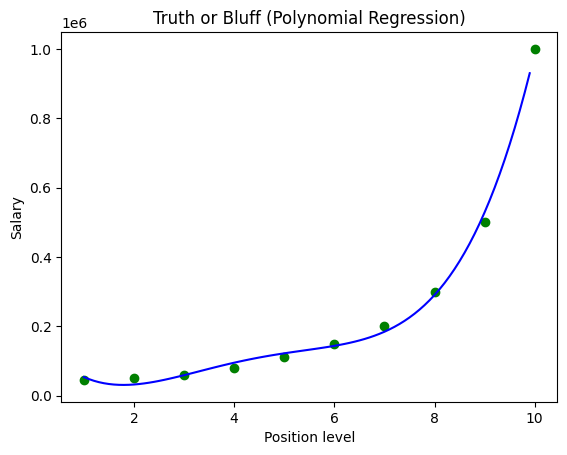

In [41]:
# x를 1,2,3 이 아닌 1, 1.1, 1.2, ...9.9, 10으로 쪼갬갬
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'green')

plt.plot(X_grid, lin_reg_4.predict(poly_reg4.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression
선형 회귀 6.5 직급 수준 급여 예측

In [26]:
lin_reg.predict([[6.5]])

# 잘못된 예측.....

array([330378.78787879])

## Predicting a new result with Polynomial Regression
다항 회귀로 예측

In [36]:
# poly_reg = PolynomialFeatures(degree = 2)
# X_poly = poly_reg.fit_transform(X)
# 일때 예측 값

lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

In [37]:
# poly_reg4 = PolynomialFeatures(degree = 4)
# X_poly4 = poly_reg4.fit_transform(X)
# 일때 예측 값
lin_reg_4.predict(poly_reg4.fit_transform([[6.5]]))

array([158862.45265155])